In [12]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/early-stage-diabetes-risk-prediction-dataset/diabetes_data_upload.csv


In [13]:
import matplotlib.pyplot as plt

In [14]:
from sklearn.linear_model import LogisticRegression

Importing the data

In [15]:
df=pd.read_csv('../input/early-stage-diabetes-risk-prediction-dataset/diabetes_data_upload.csv')
df

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,Female,Yes,Yes,Yes,No,Yes,No,No,Yes,No,Yes,Yes,No,No,No,Positive
516,48,Female,Yes,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,No,No,Positive
517,58,Female,Yes,Yes,Yes,Yes,Yes,No,Yes,No,No,No,Yes,Yes,No,Yes,Positive
518,32,Female,No,No,No,Yes,No,No,Yes,Yes,No,Yes,No,No,Yes,No,Negative


In [16]:
df=df.drop('Gender',1)

In [17]:
df = df.replace(['Yes','No','Positive','Negative'],[1,0,1,0])
df

,Age,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


In [18]:
df

,Age,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,39,1,1,1,0,1,0,0,1,0,1,1,0,0,0,1
516,48,1,1,1,1,1,0,0,1,1,1,1,0,0,0,1
517,58,1,1,1,1,1,0,1,0,0,0,1,1,0,1,1
518,32,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0


Data exploaration and cleaning

In [19]:
Age_range=(df['Age'].min(),df['Age'].max())
Age_range

(16, 90)

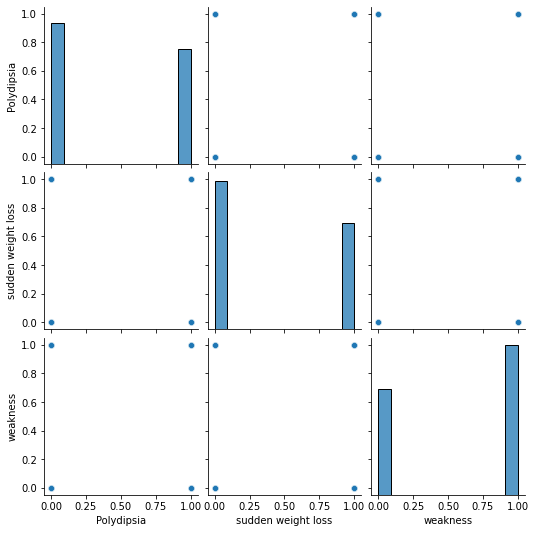

In [21]:
import seaborn as sns
sns.pairplot(df.iloc[:,2:5])


/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 22.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 45.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Polyuria', ylabel='class'>

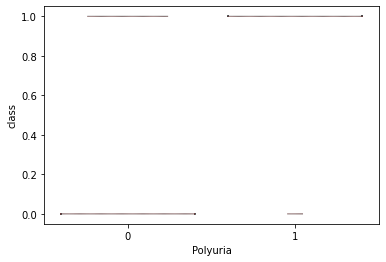

In [22]:
sns.swarmplot(x='Polyuria',y='class',color='red',linewidth=0.5,size=0.5,data=df)

<AxesSubplot:xlabel='class', ylabel='Polyuria'>

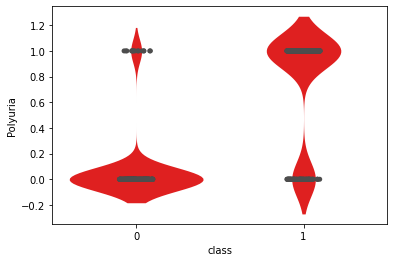

In [31]:
sns.violinplot(x='class',y='Polyuria',color='red',linewidth=0,size=5,data=df)
sns.stripplot(x='class',y='Polyuria',color='.3',linewidth=0,size=5,data=df)

In [27]:
len(df[(df['Polyuria'] == 1) & (df['class'] == 1)])

243

In [28]:
len(df[(df['Polyuria'] == 0) & (df['class'] == 0)])

185

In [29]:
len(df[(df['Polyuria'] == 0) & (df['class'] == 1)])

77

In [30]:
len(df[(df['Polyuria'] == 1) & (df['class'] == 0)])

15

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Initialize Figure and Axes object
#fig, ax = plt.subplots(figsize=(60,20))
figsize=(1000,20)
# Create swarmplot
sns.swarmplot(x='class',y='Polyuria', data=df)

# Show plot
plt.show()

In [ ]:
sns.catplot(x='class',y='Polyuria',data=df.head(250))

In [ ]:
df['Obesity'].plot.hist()

From the above graph we can see and range we can see that the ages are ranging from 16 to 90. So they are correct and no wrong entries are there in this Age column

In [ ]:
pd.Categorical(df['Gender'])

The gender category contain only Male and Female Entries. So this coulmn is correct

In [ ]:
df.info()

Since most of the data we have is categorical data , histogram plot helps us to visuavalize the data better

In [ ]:
import plotly.express as px
fig=px.histogram(df,x='class')
fig.show()

In [ ]:
df.columns

In [ ]:
import plotly.express as px
for i in df.columns:
    fig=px.histogram(df,x=i)
    fig.show()

The data set we have contains 320 number of diabetic people and 200 number of healthy people

In [ ]:
import plotly.express as px
fig=px.histogram(df,x='Gender')
fig.show()

There are More number of Males(328) than females(192)  in our data set

In [ ]:
N=df[['Polyuria','class']]
N

**Important******

In [ ]:
len(df[(df['Polyuria'] == 1) & (df['class'] == 1)])

In [ ]:
N[N.class==N.class.max() and N.Polyuria==N.Polyuria.max()]

In [ ]:
correlation=df.corr()


In [ ]:
import plotly.express as px
fig = px.imshow(correlation)
fig.show()

From the above corelation chart , we observed that polyuria and polydipsia are the most influencing factors.
Sudden weight loss, polyphagia and partial paresis are moderately affecting factors
Itching,Delayed healing and obesity are the least influencing factors


In [ ]:
sns.distplot(df['class'], kde=True, hist=True)

In [ ]:
len(df[df['Polyuria']==df['class']])

In [ ]:
len(df[df['Polydipsia']==df['class']])

In [ ]:
len(df[df['Obesity']!=df['class']])

In [ ]:
DDf=pd.DataFrame(dict(time=[0,1,1,0,0],value=[1,0,1,1,0]))
DDf

In [ ]:
g=sns.relplot(x='time',y='value',kind='line',data=DDf)
g.fig.show()

In [ ]:
import plotly.express as px
df = px.data.tips()
fig = px.histogram(df, x="total_bill")
fig.show()

In [ ]:
import plotly.express as px
df3=px.data.tips()
df3

In [ ]:
Training_set = df[:400]
Test_set = df[400:470]
cross_validation_set = df[470:]
#cross_validation_set.drop(['Gender'],inplace=True)

In [ ]:
#cross_validation_set=cross_validation_set.drop('Gender',1)

In [ ]:
trainLabel = np.asarray(df['class'])
trainData = np.asarray(df.drop('class',1))
#trainData = np.asarray(df.drop('Gender',1))
testLabel = np.asarray(df['class'])
testData = np.asarray(df.drop('class',1))
#testData = np.asarray(df.drop('Gender',1))

In [ ]:
means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)
trainData = (trainData - means)/stds
testData = (testData - means)/stds

In [ ]:
#np.mean(trainData, axis=0) # check that new means equal 0
np.std(trainData, axis=0)

In [ ]:
diabetesCheck = LinearRegression()
diabetesCheck.fit(trainData, trainLabel)

In [ ]:

#from sklearn.externals import joblib
diabetesCheck = LogisticRegression()
diabetesCheck.fit(trainData, trainLabel)

In [ ]:
type(diabetesCheck)

In [ ]:
len(diabetesCheck)

In [ ]:
accuracy = diabetesCheck.score(testData, testLabel)
print("accuracy = ", accuracy * 100, "%")

In [ ]:
sum(diabetesCheck.coef_[0])

In [ ]:
trainData = Training_set.drop('class',1)

In [ ]:
labels = list(trainData.columns)

In [ ]:
coeff = list(diabetesCheck.coef_[0])
labels = list(trainData.columns)
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = features.positive.map({True: 'blue', False: 'red'}))
plt.xlabel('Importance')

In [ ]:
features = pd.DataFrame()
features

In [ ]:
coeff = list(diabetesCheck.coef_[0])
coeff

This below block of code is for our understanding only. remove this in project doc  

In [ ]:
import joblib
joblib.dump([diabetesCheck, means, stds], 'diabeteseModel.pkl')

In [ ]:
diabetesLoadedModel, means, stds = joblib.load('diabeteseModel.pkl')
accuracyModel = diabetesLoadedModel.score(testData, testLabel)
print("accuracy = ",accuracyModel * 100,"%")

In [ ]:
print(cross_validation_set.head())

In [ ]:
sampleData = cross_validation_set[:]
# prepare sample
sampleDataFeatures = np.asarray(sampleData.drop('class',1))
#sampleDataFeatures = np.asarray(sampleData.drop('Gender',1))
sampleDataFeatures = (sampleDataFeatures - means)/stds
# predict
predictionProbability = diabetesLoadedModel.predict_proba(sampleDataFeatures)
prediction = diabetesLoadedModel.predict(sampleDataFeatures)
print('Probability:', predictionProbability)
print('prediction:', prediction)

In [ ]:
len(prediction)

In [ ]:
cross_validation_set[:]

In [ ]:
sampleDataFeatures = np.asarray(sampleData.drop('class',1))

In [ ]:
sampleDataFeatures

In [ ]:
x=list(input().split())

In [ ]:
x

In [ ]:
sampleDataFeatures = np.array([[45,  0,  0,  0,  0,  1,  1,  0,  0,  0,  0,  0,  0,  0,  0],[57,  0,  0,  0,  0,  1,  0,  1,  0,  0,  0,  0,  1,  0,  0]])
#sampleDataFeatures = np.asarray(sampleData.drop('Gender',1))
sampleDataFeatures = (sampleDataFeatures - means)/stds
# predict
predictionProbability = diabetesLoadedModel.predict_proba(sampleDataFeatures)
prediction = diabetesLoadedModel.predict(sampleDataFeatures)
print('Probability:', predictionProbability)
print('prediction:', prediction)

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(df['Polyuria'], df['class'])
plt.show()

In [ ]:
import plotly.express as px
    
fig = px.scatter(df, x="Polyuria", y="class", title='Polyuria vs diabetes')
#fig.add_scatter(x=df['<col_name>'], y=df['<line2_col>'], mode='lines', hovertext=df['<hover_col>'], hoverinfo="text",)
fig.show()

In [ ]:
df1 = df.iloc[:, 0:2].head(3)
df1

In [ ]:
higher_age_people=df['Age'][df['Age']>80]
print(higher_age_people)